<a href="https://colab.research.google.com/github/nu-jliu/MECH_ENG_314/blob/main/Homeworks/HW0/Homework_0_Allen_Liu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME314 Homework 0

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. Your homework will be graded IFF you submit a **single** PDF and a link to a Google colab file that meet all the requirements outlined below.

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) and include simplified code outputs (e.g. .simplify()).
- Enable Google Colab permission for viewing
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change"
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

**Link to the google colab: ** <br/>
<a href='https://colab.research.google.com/drive/1SLCHRvwR_UdRAsgKU2ymQ2qDHB8BcNIB?usp=sharing'>Google Colab Link</a>

### People who worked with
 - Leo Chen
 - Ananya Agarwal
 - Ishani Narwankar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#IMPORT ALL NECESSARY PACKAGES AT THE TOP OF THE CODE
import math
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

In [ ]:
# ##############################################################################################
# # If you're using Google Colab, uncomment this section by selecting the whole section and press
# # ctrl+'/' (Linux/Windows) or cmd+'/' (MacOS) on your and keyboard. Run it before you start
# # programming, this will enable the nice LaTeX "display()" function for you. If you're using
# # the local Jupyter environment, leave it alone
# ##############################################################################################


def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

## Problem 1 (20pts)

Given a function $f(x)=\sin(x)$, find the derivative of $f(x)$ and find the directional derivative of $f(x)$ in the direction $v$.  Moreover, compute these derivatives using Pythons's SymPy package.

*Hint 1: As an example, below is the code solving the problem when $f(x) = x^2$ (feel free to take it as a start point for your solution).*

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution for both derivatives (or you can use $\LaTeX$, instead of hand writing). Also, turn in the code used to compute the symbolic solutions for both derivatives and the code output.**

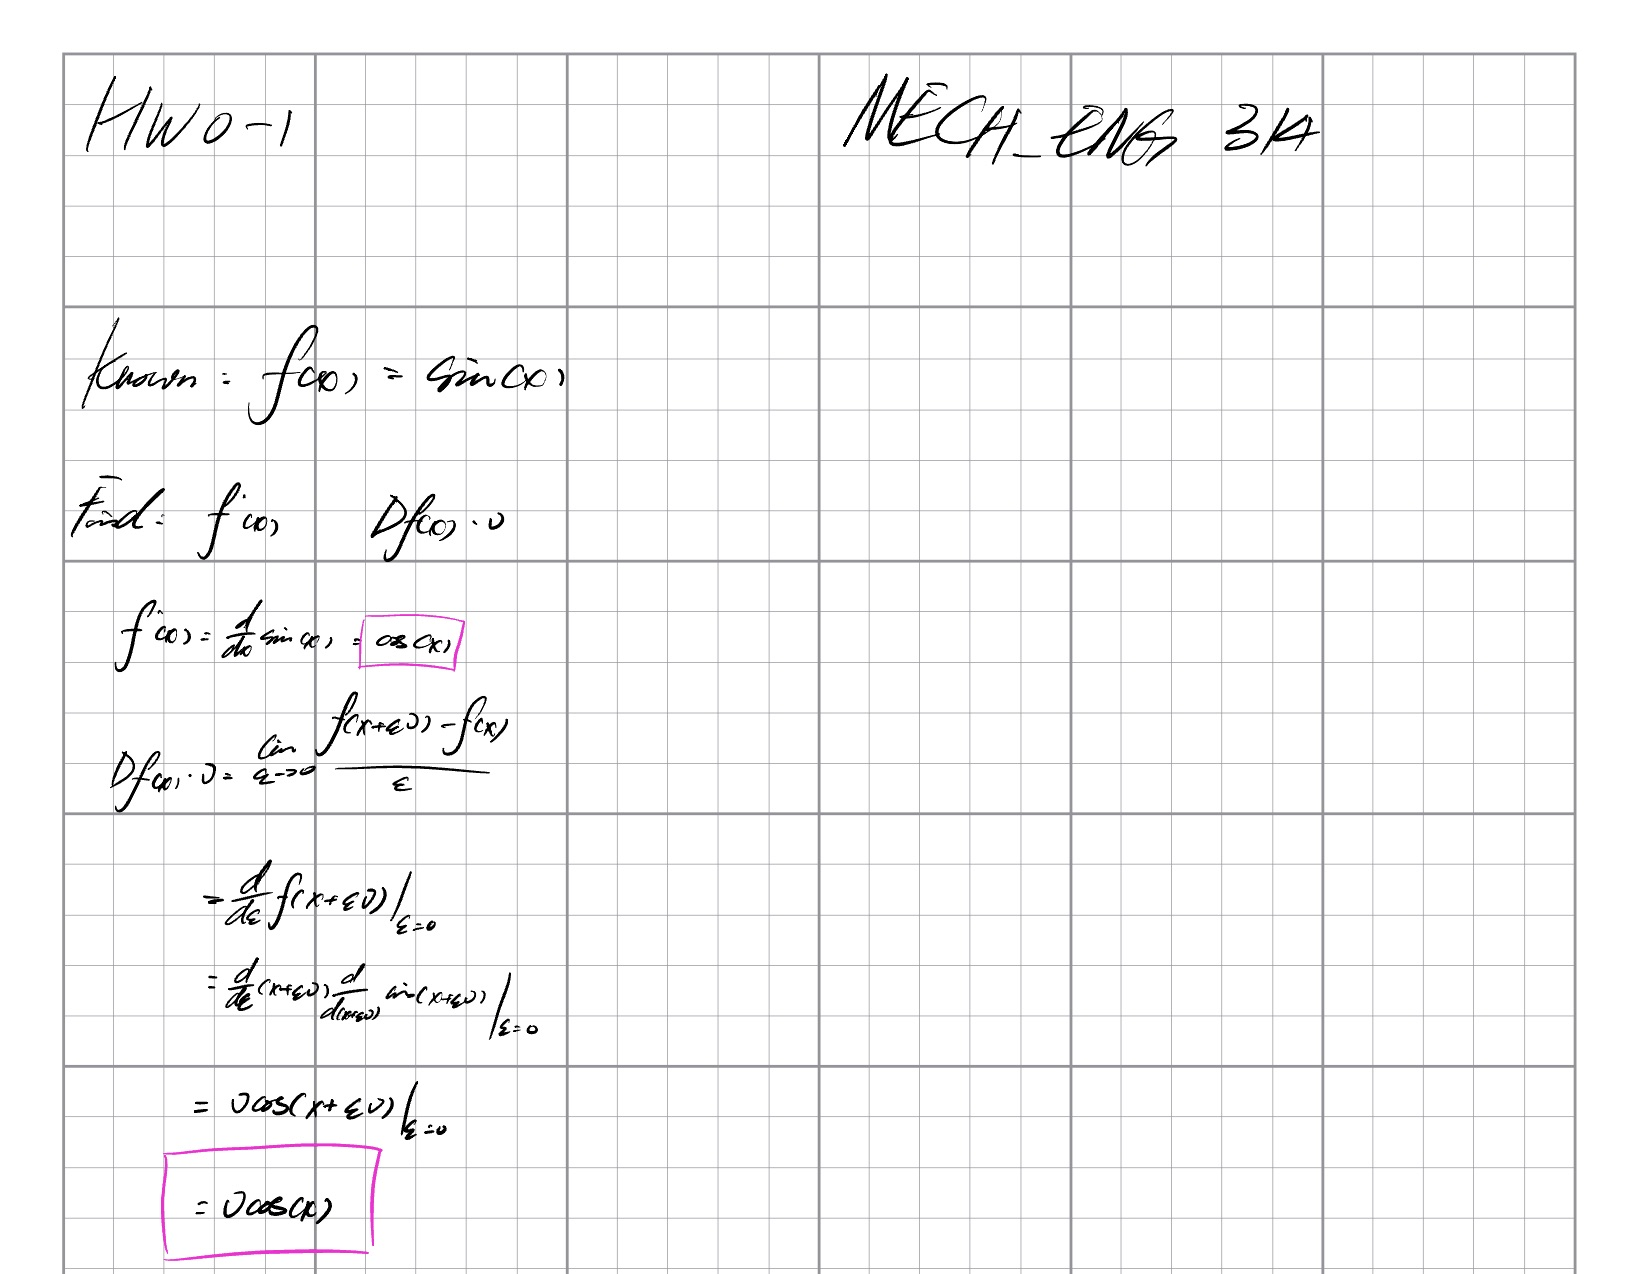

In [ ]:
# You can start your implementation here :)
x = sym.symbols('x')
f = sym.sin(x)
df = f.diff(x)

display(Markdown("**Derivative of f(x) is:**"))
display(Markdown('$\mathbf{' + f'{df}' + '}$'))

eps, v = sym.symbols(r'\epsilon, v')
new_f = sym.sin(x + v*eps)
df_eps = new_f.diff(eps)
print("\nDerivative of f with respect to eplison:")
display(df_eps)

new_df = df_eps.subs(eps, 0)
display(Markdown("<br/>**Directional derivative is:**"))
display(Markdown('$\mathbf{' + f'{new_df}' + '}$'))

**Derivative of f(x) is:**

$\mathbf{cos(x)}$


Derivative of f with respect to eplison:


v⋅cos(\epsilon⋅v + x)

<br/>**Directional derivative is:**

$\mathbf{v*cos(x)}$

## Problem 2 (20pts)

Given a function of trajectory:
$$
J(x(t)) = \int_0^{\pi/2} \frac{1}{2} x(t)^2 dt
$$
Compute the analytical solution when $x=\cos(t)$, verify your answer by numerical integration.

The code for numerical integration is provided below:

In [ ]:
def integrate(func, xspan, step_size):
    '''
    Numerical integration with Euler's method

    Parameters:
    ====================
    func: Python function
        func is the function you want to integrate for
    xspan: list
        xspan is a list of two elements, representing
        the start and end of integration
    step_size:
        a smaller step_size will give a more accurate result

    Returns:
    int_val:
        result of the integration
    ====================
    '''
    x = np.arange(xspan[0], xspan[1], step_size)
    int_val = 0
    for xi in x:
        int_val += func(xi) * step_size
    return int_val

# a simple test
def square(x):
    return x**2
print( integrate(func=square, xspan=[0, 1], step_size=0.01) )
# or you just call the function without indicating parameters
# print( integrate(square, [0, 1], 0.01) )

0.32835000000000014


**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written analytical solution (or you can use $\LaTeX$). Also, turn in the code you used to numerically evaluate the result and the code output.**

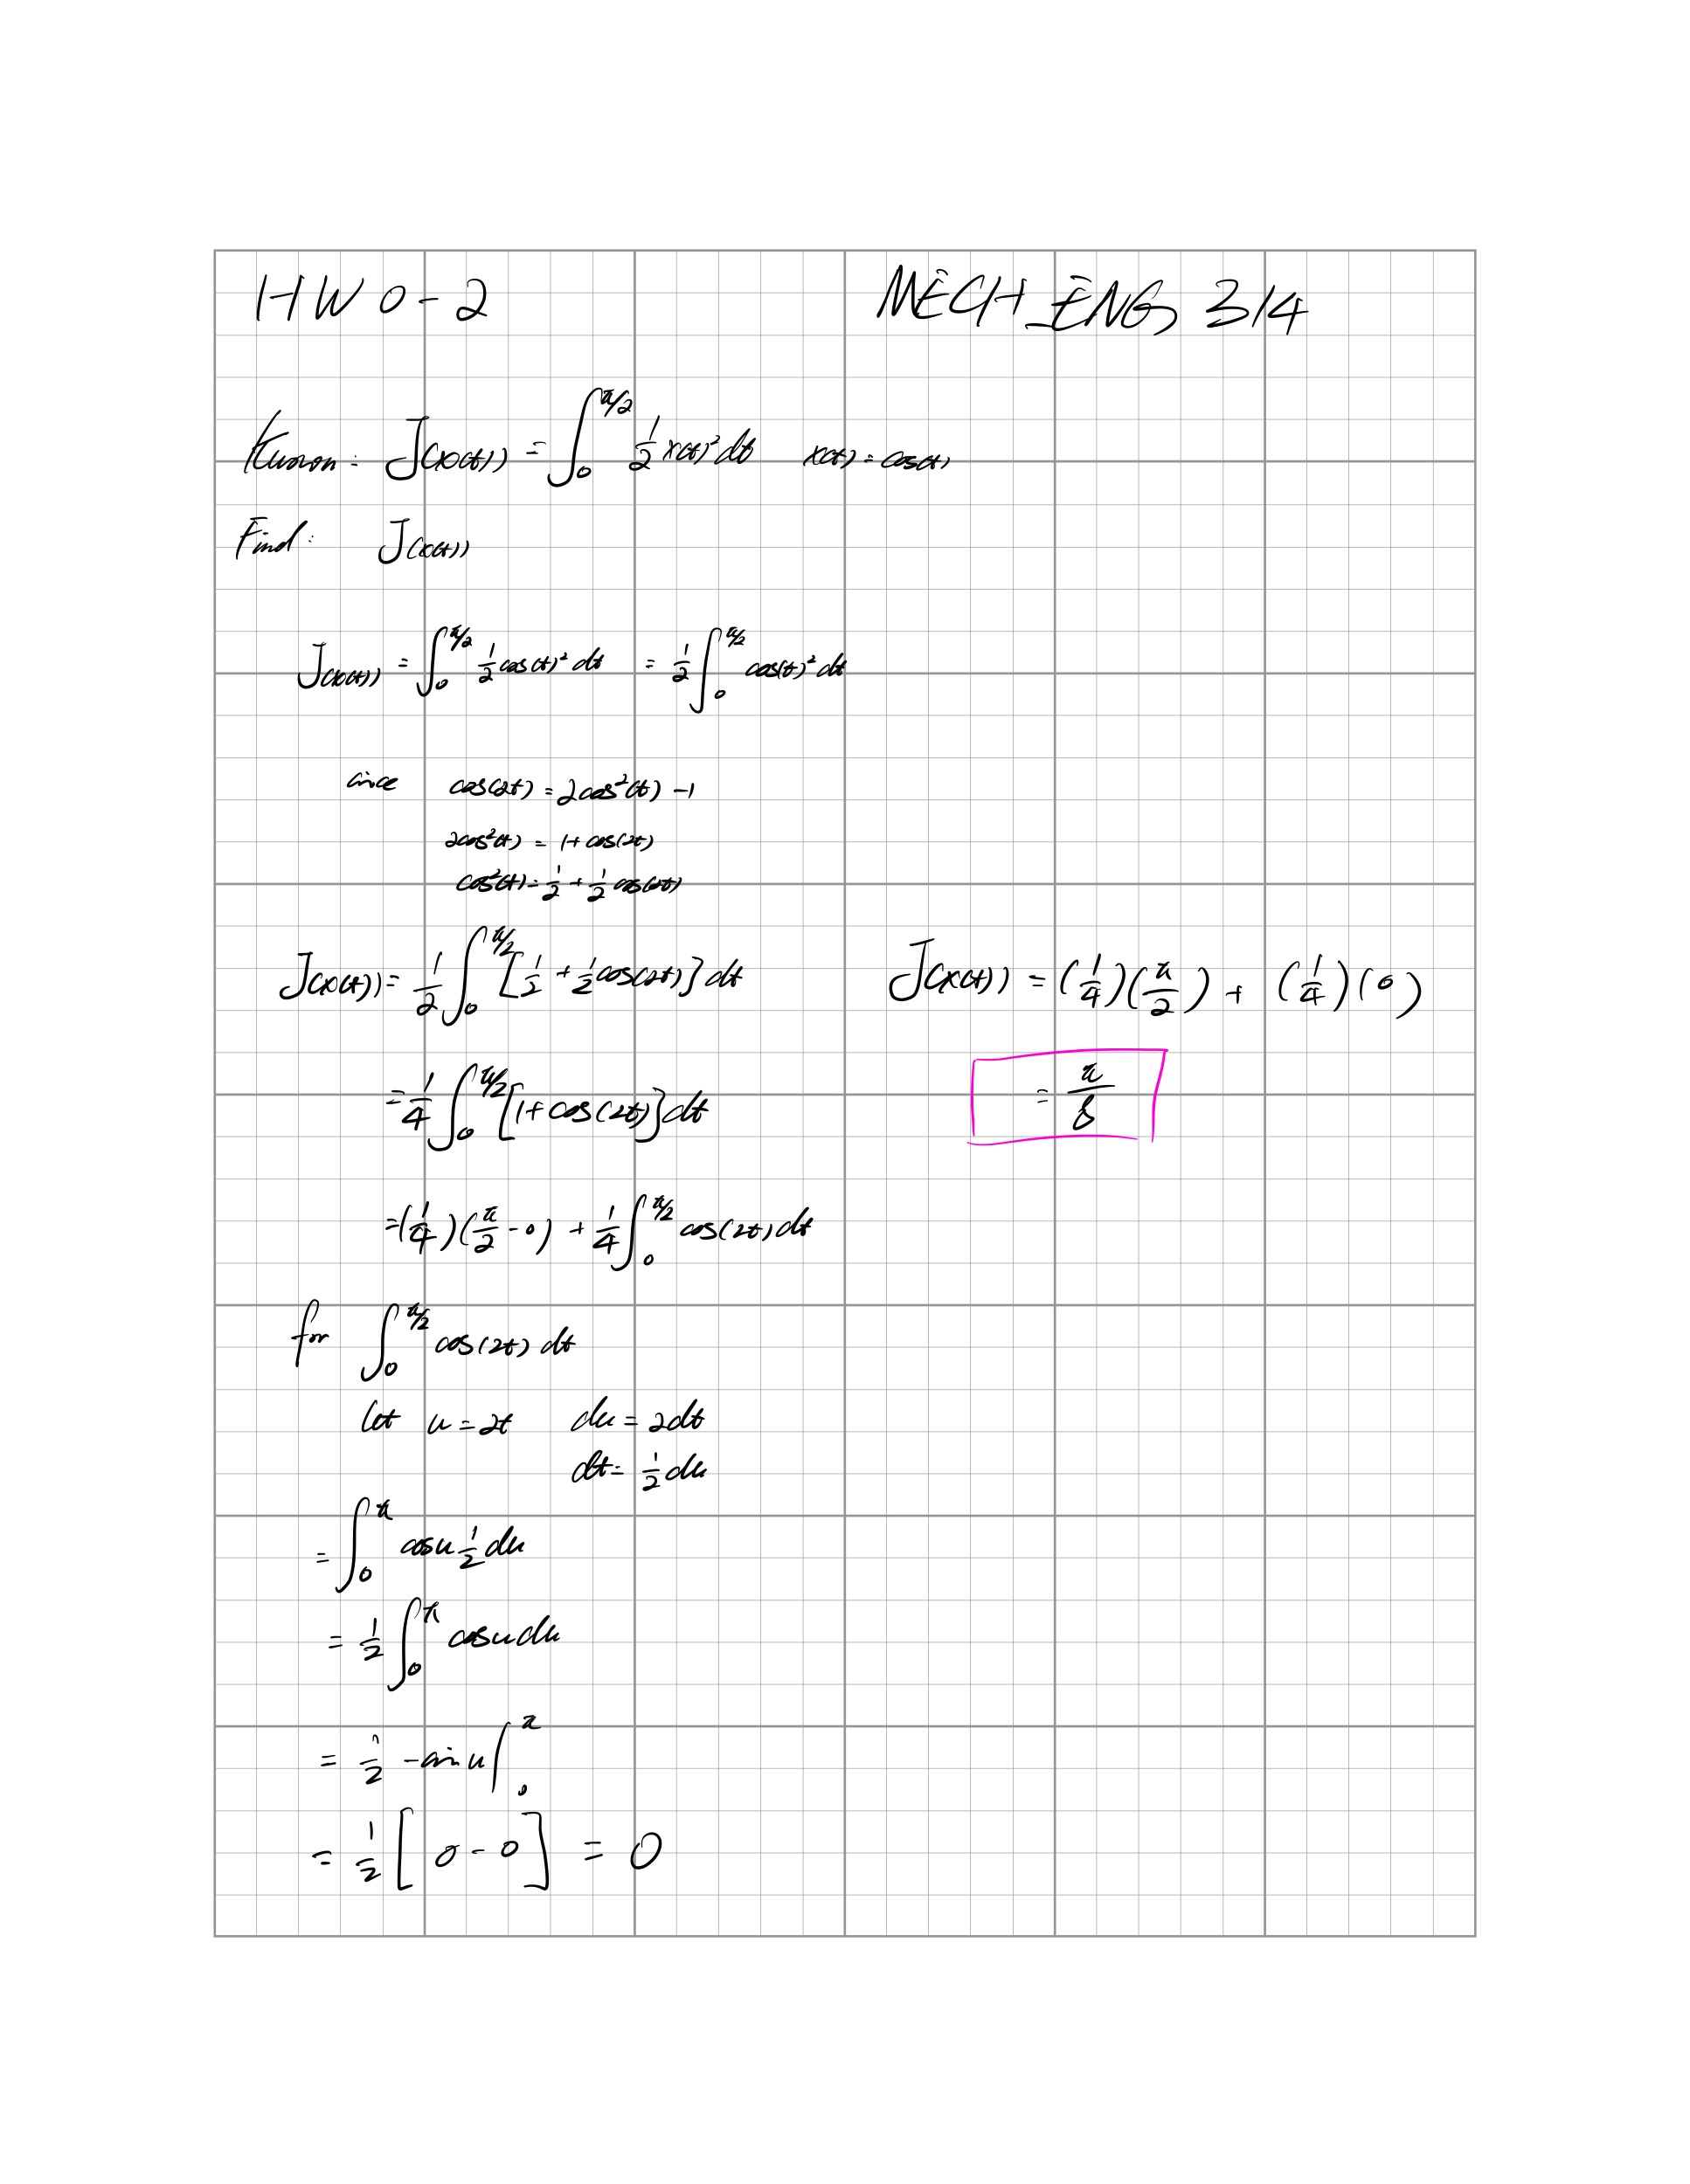

In [ ]:
# You can start your implementation here :)
def func_traj(t):
    x = np.cos(t)
    return (x ** 2) / 2
sol = integrate(func=func_traj, xspan=[0, math.pi/2], step_size=0.01)
display(Markdown(f'The solution of integration is: **{sol}**'))

The solution of integration is: **0.3951990765638034**

## Problem 3 (20pts)

For the function $J(x(t))$ in Problem 2, compute and evaluate the analytical solution for the directional derivative of $J$ at $x(t) = \cos(t)$, in the direction $v(t) = \sin(t)$. The directional derivative should be in the form of integration, evaluate the integration analytically, and verify it using numerical integration.

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written analytical solution (or you can use $\LaTeX$), you need to evaluate the integration in this problem. Also, include the code used to numerically verify the integration result.**

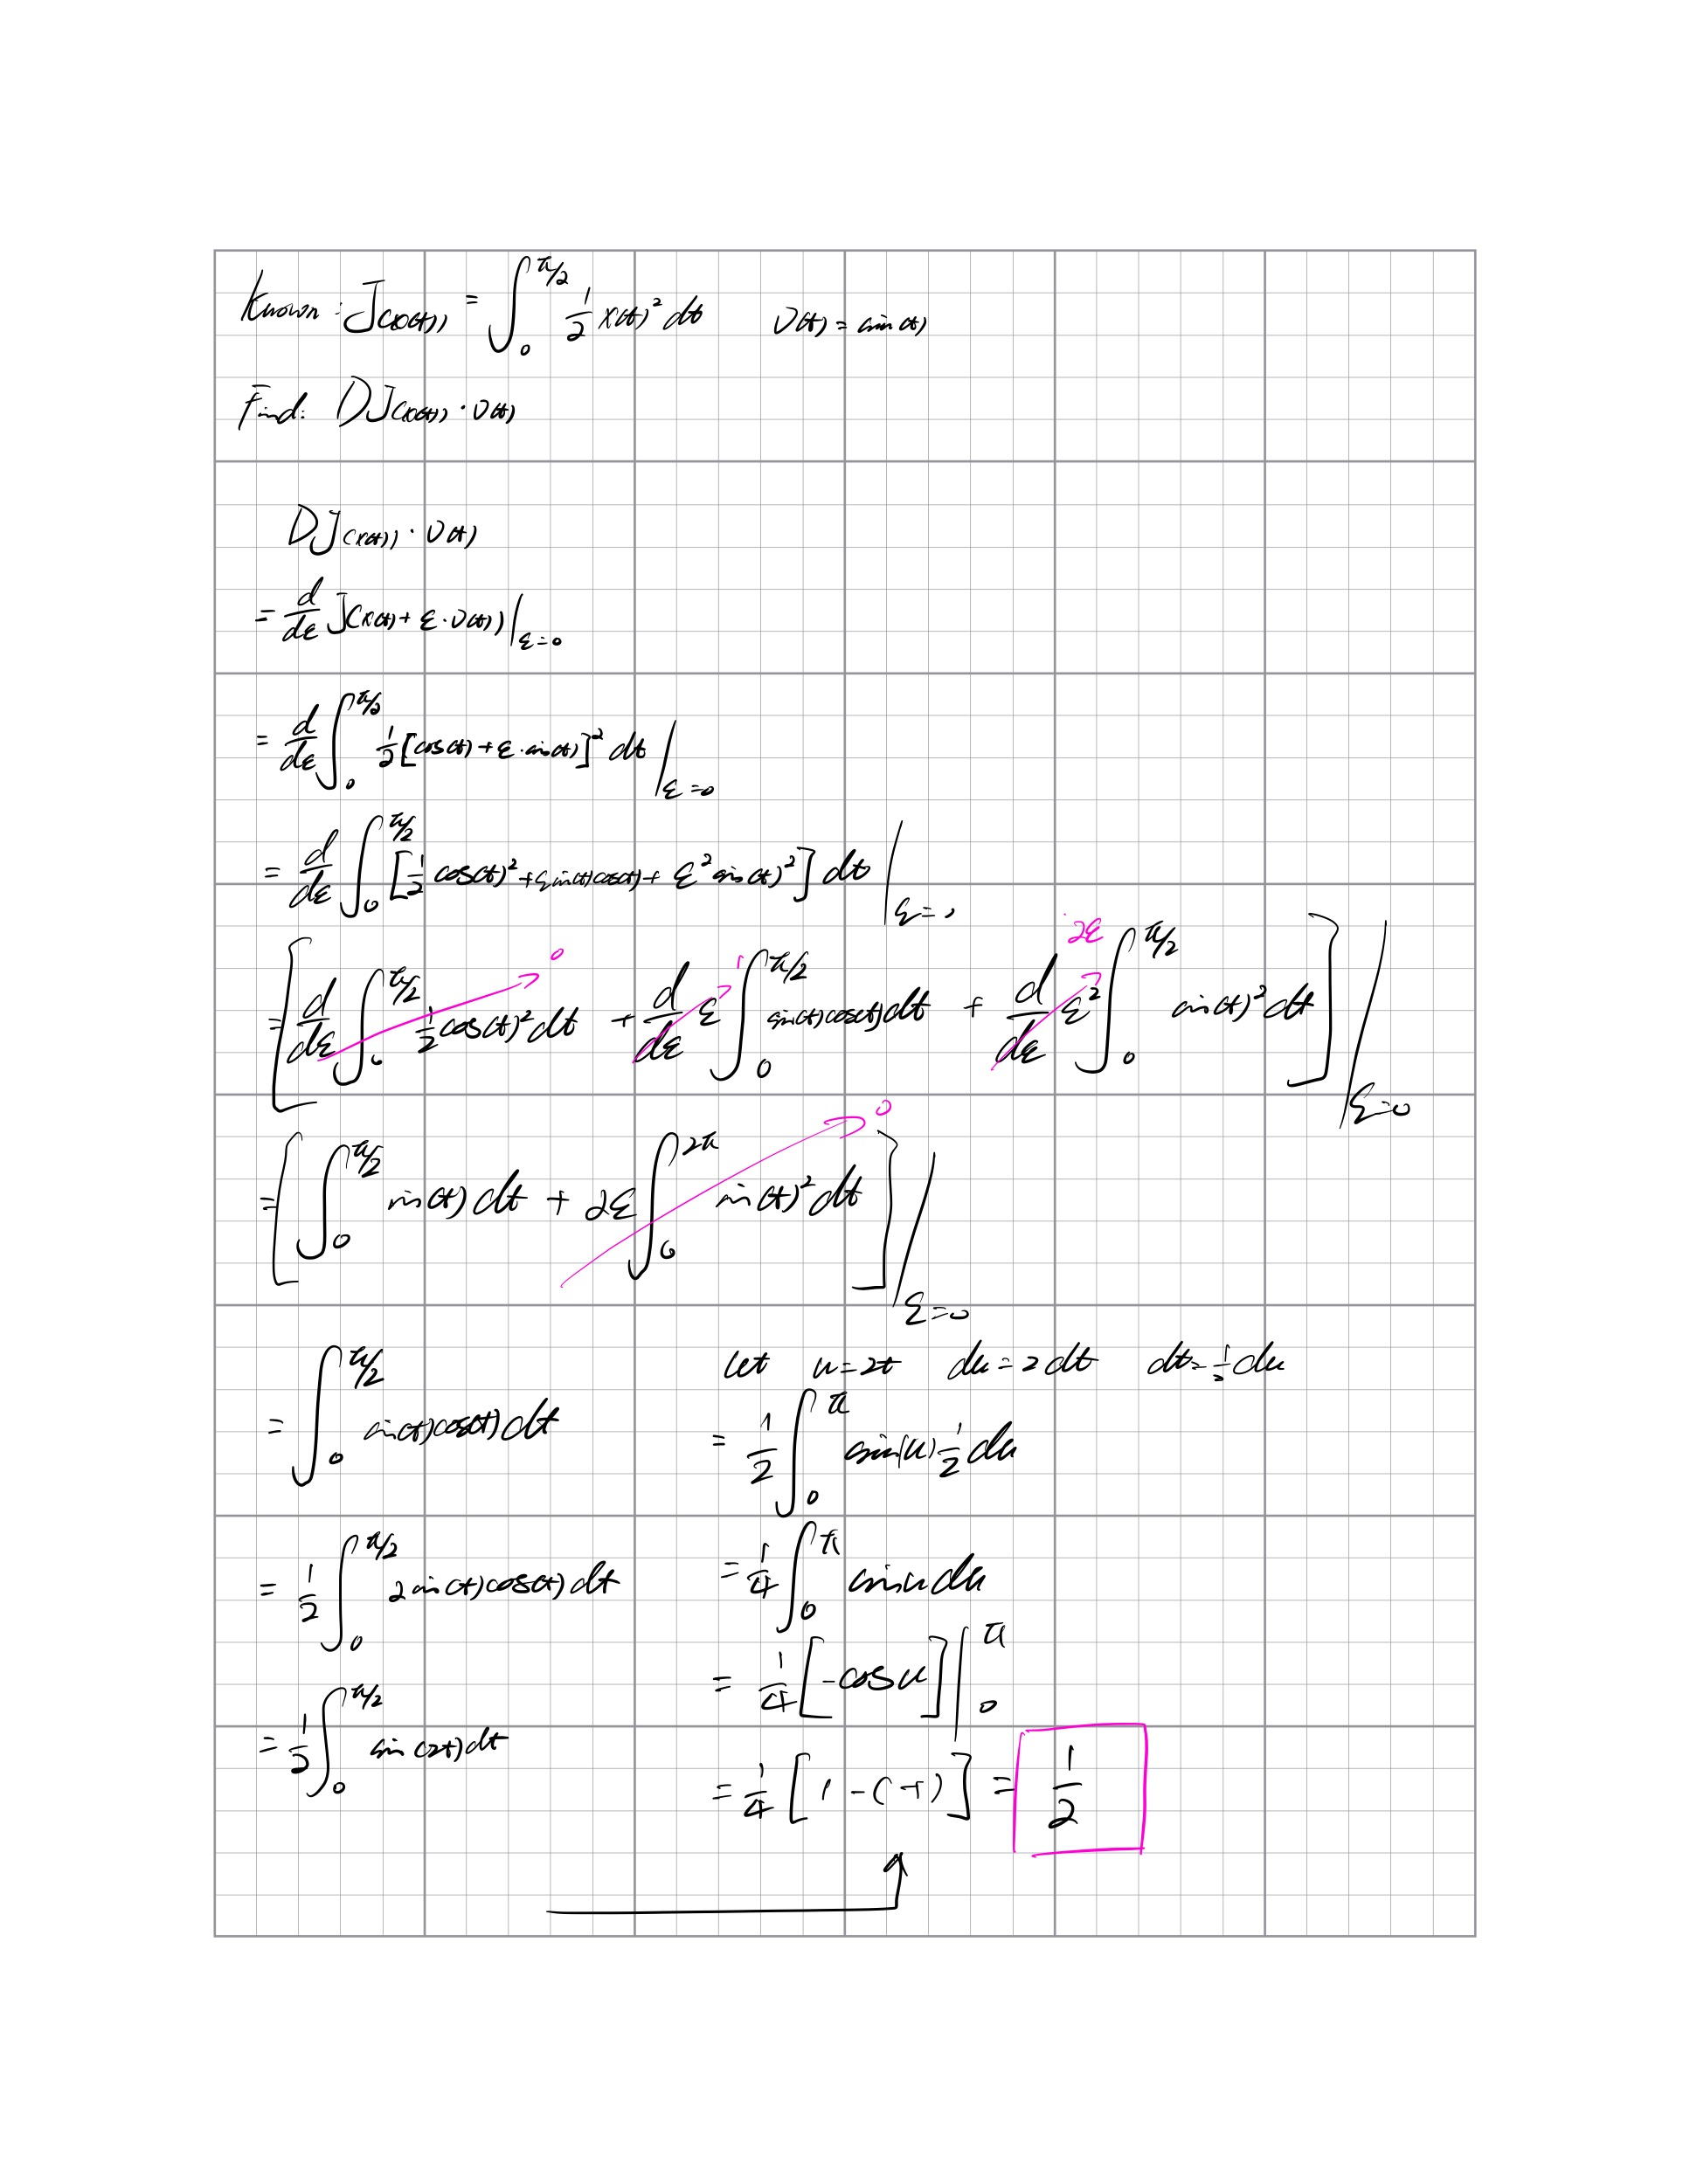

In [ ]:
# Put this in your import cell.
# from IPython.display import Markdown, display

result = integrate(func=lambda x: np.sin(x)*np.cos(x), xspan=[0, math.pi/2], step_size=0.01)
display(Markdown(f'**The result of numerical integration is: {result}**'))

**The result of numerical integration is: 0.4999869977969663**

## Problem 4 (20pts)

Verify your answer in Problem 3 symbolically using Python's SymPy package, this means you need to compute the directional derivative and evaluate the integration all symbolically.

*Hint 1: Different from computing directional derivative in Problem 1, this time the function includes integration. Thus, instead of defining x as a symbol, you should define x as a function of symbol t. An example of defining function and taking the derivative of the function integration is provided below.*

**Turn in: A copy of the code you used to numerically and symbolically evaluate the solution as well as the corresponding code output for both.**

In [ ]:
# You can start your implementation here :)
t = sym.symbols('t')
eps = sym.symbols(r'\epsilon')

x = sym.Function('x')(t)
v = sym.Function('v')(t)

J = sym.integrate(1/2*(x + eps*v)**2, [t, 0, sym.pi/2])
print('J(x(t) + eps*v(t)) = ')
display(J)

dJdeps = J.diff(eps)
print('\nderivative of J(x(t) + eps*v(t))) wrt eps: ')
display(dJdeps)

dJdeps_subs = dJdeps.subs({eps:0}).simplify()
dJdeps_subs = dJdeps_subs.subs({x:sym.sin(t), v:sym.cos(t)})
display(Markdown('<br/>**The Directional derivative is:**'))
display(dJdeps_subs)
display(Markdown('<br/>**Evaluation of the directional derivative is:**'))
display(Markdown(f'**{sym.N(dJdeps_subs)}**'))

J(x(t) + eps*v(t)) = 


    π                                                          π         
    ─                          π                               ─         
    2                          ─                               2         
    ⌠                          2                               ⌠         
    ⎮         2  2             ⌠                               ⎮  2      
0.5⋅⎮ \epsilon ⋅v (t) dt + 0.5⋅⎮ 2⋅\epsilon⋅v(t)⋅x(t) dt + 0.5⋅⎮ x (t) dt
    ⌡                          ⌡                               ⌡         
    0                          0                               0         


derivative of J(x(t) + eps*v(t))) wrt eps: 


    π                                           
    ─                           π               
    2                           ─               
    ⌠                           2               
    ⎮             2             ⌠               
0.5⋅⎮ 2⋅\epsilon⋅v (t) dt + 0.5⋅⎮ 2⋅v(t)⋅x(t) dt
    ⌡                           ⌡               
    0                           0               

<br/>**The Directional derivative is:**

    π                 
    ─                 
    2                 
    ⌠                 
1.0⋅⎮ sin(t)⋅cos(t) dt
    ⌡                 
    0                 

<br/>**Evaluation of the directional derivative is:**

**0.500000000000000**

## Problem 5 (20pts)

Given the equation:
$$
xy + \sin(x) = x + y
$$
Use Python's SymPy package to symbolically solve this equation for $y$, thus you can write $y$ as a function of $x$. Transfer your symbolic solution into a numerical function and plot this function for $x\in[0, \pi]$ with Python's Matplotlib package.

In this problem you will use two methods in SymPy. The first is its symbolic sovler method **solve()**, which takes in an equation or expression (in this it equals 0) and solve it for one or one set of variables. Another method you will use is **lambdify()**, which can transfer a symbolic expression into a numerical function automatically (of course in this problem we can hand code the function, but later in the class we will have super sophisticated expression to evaluate.

Below is an example of using these two methods for an equation $2x^3\sin(4x) = xy$ (feel free to take this as the start point for your solution):

**Turn in: A copy of the code used to solve for symbolic solution and evaluate it as a numerical function. Also, include the plot of the numerical function.**

Original equation


x⋅y + sin(x) = x + y

**<br/>Symbolic solutions are:**

⎡x - sin(x)⎤
⎢──────────⎥
⎣  x - 1   ⎦

**<br/>Plot of solution:**

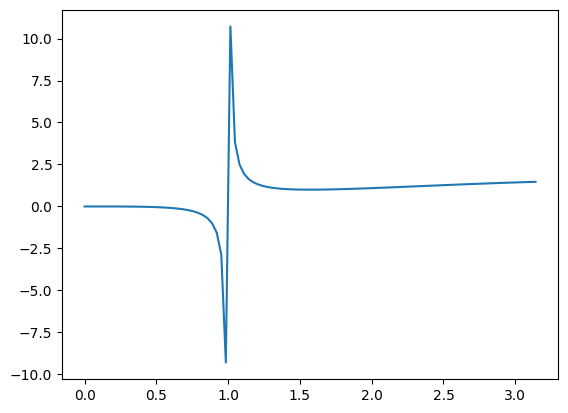

In [ ]:
# You can start your implementation here :)
x, y = sym.symbols(r'x, y')
eqn = sym.Eq(x*y + sym.sin(x), x + y)
print('Original equation')
display(eqn)

y_sol = sym.solve(eqn, y)
display(Markdown('**<br/>Symbolic solutions are:**'))
display(y_sol)
y_expr = y_sol[0]

display(Markdown('**<br/>Plot of solution:**'))
func = sym.lambdify(x, y_expr)
# print('Test: func(2.0) = ', func(2.0))
x_list = np.linspace(0, np.pi, 100)
f_list = func(x_list)
plt.plot(x_list, f_list)
plt.show()
print('\n\n\n\n\n\n\n')











**Allen Liu**